In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Understanding the Data
file_path = "/Users/rk/Downloads/BankChurners.csv"
df = pd.read_csv(file_path)

# Drop irrelevant columns
df_cleaned = df.drop(columns=['CLIENTNUM', 
                              'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
                              'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

# Convert categorical variables to numerical
df_cleaned['Attrition_Flag'] = df_cleaned['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})
df_cleaned['Gender'] = df_cleaned['Gender'].map({'M': 0, 'F': 1})

# One-hot encode categorical columns
df_cleaned = pd.get_dummies(df_cleaned, columns=['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'])

# Display basic information about the dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

(None,
    CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
 0  768805383  Existing Customer            45      M                3   
 1  818770008  Existing Customer            49      F                5   
 2  713982108  Existing Customer            51      M                3   
 3  769911858  Existing Customer            40      F                4   
 4  709106358  Existing Customer            40      M                3   
 
   Education_Level Marital_Status Income_Category Card_Category  \
 0     High School        Married     $60K - $80K          Blue   
 1        Graduate         Single  Less than $40K          Blue   
 2        Graduate        Married    $80K - $120K          Blue   
 3     High School        Unknown  Less than $40K          Blue   
 4      Uneducated        Married     $60K - $80K          Blue   
 
    Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
 0              39  ...       12691.0                  777      

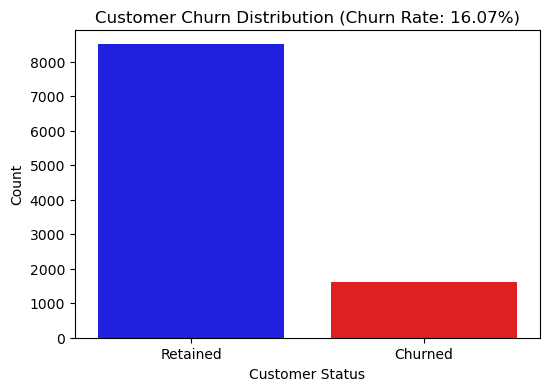

In [65]:
#Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate churn rate
churn_rate = df["Attrition_Flag"].mean() * 100

# Create a count plot for churned vs retained customers
plt.figure(figsize=(6, 4))
sns.countplot(x="Attrition_Flag", data=df, hue="Attrition_Flag", palette=["blue", "red"], legend=False)
plt.xticks(ticks=[0, 1], labels=['Retained', 'Churned'])
plt.xlabel('Customer Status')
plt.ylabel('Count')
plt.title(f'Customer Churn Distribution (Churn Rate: {churn_rate:.2f}%)')
plt.show()

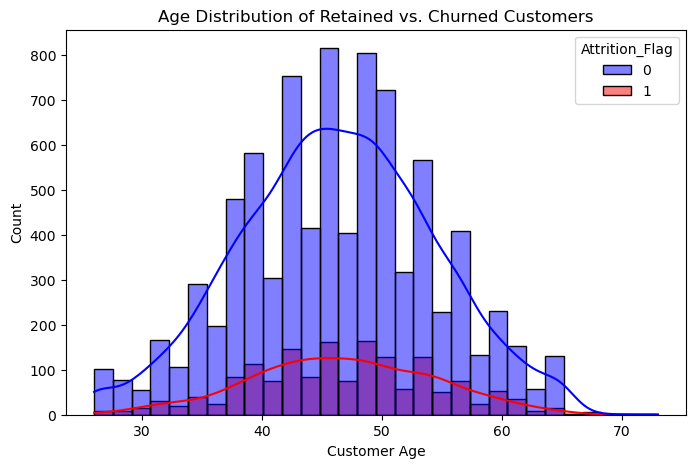

In [27]:
# Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df_cleaned, x='Customer_Age', hue='Attrition_Flag', kde=True, bins=30, palette={0: 'blue', 1: 'red'})
plt.xlabel("Customer Age")
plt.ylabel("Count")
plt.title("Age Distribution of Retained vs. Churned Customers")
plt.show()

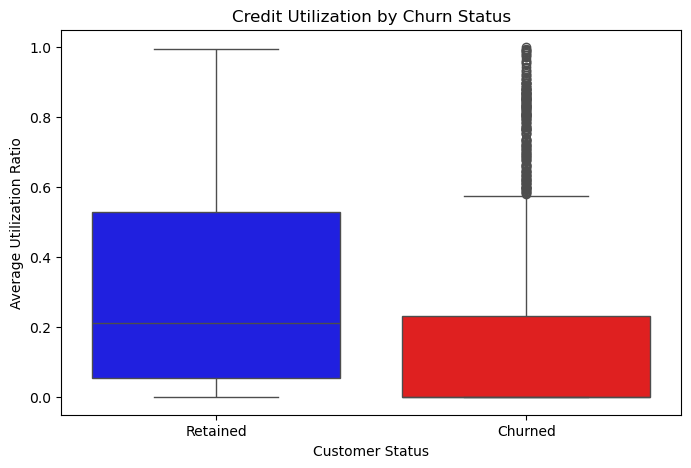

In [31]:
# Credit Utilization vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(x='Attrition_Flag', y='Avg_Utilization_Ratio', data=df_cleaned, hue='Attrition_Flag', palette=['blue', 'red'], legend=False)
plt.xticks([0, 1], ['Retained', 'Churned'])
plt.xlabel("Customer Status")
plt.ylabel("Average Utilization Ratio")
plt.title("Credit Utilization by Churn Status")
plt.show()


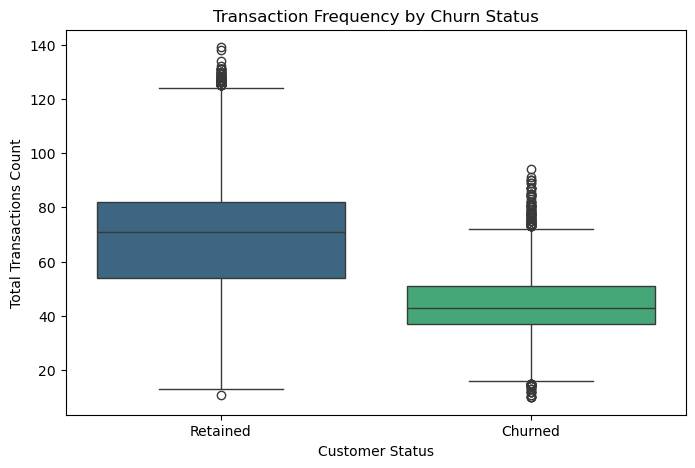

In [57]:
# Boxplot: Total Transactions Count vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x="Attrition_Flag", y="Total_Trans_Ct", data=df, hue="Attrition_Flag", palette="viridis", legend=False)
plt.xticks(ticks=[0, 1], labels=["Retained", "Churned"])
plt.xlabel("Customer Status")
plt.ylabel("Total Transactions Count")
plt.title("Transaction Frequency by Churn Status")
plt.show()


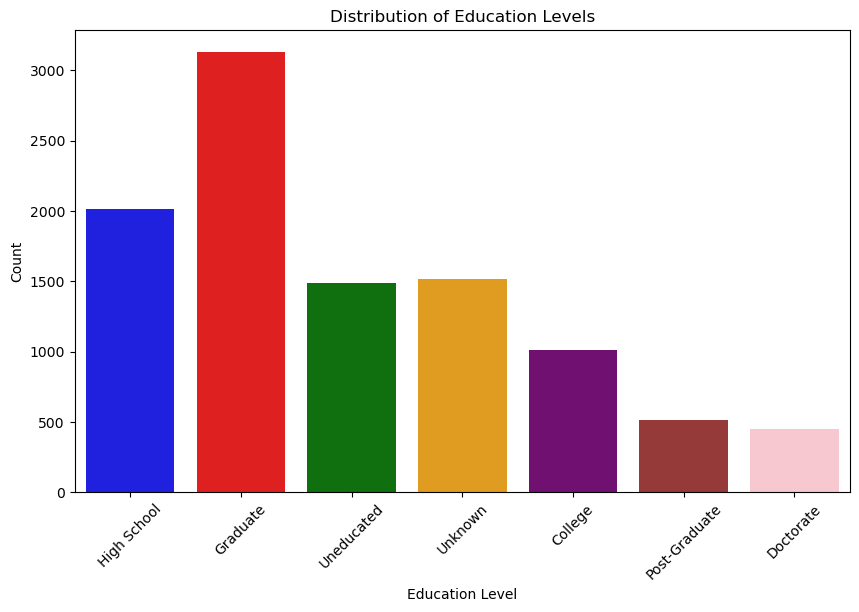

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

custom_colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink']

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Education_Level', hue='Education_Level', palette=custom_colors, legend=False)

plt.xticks(rotation=45)
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.title("Distribution of Education Levels")
plt.show()


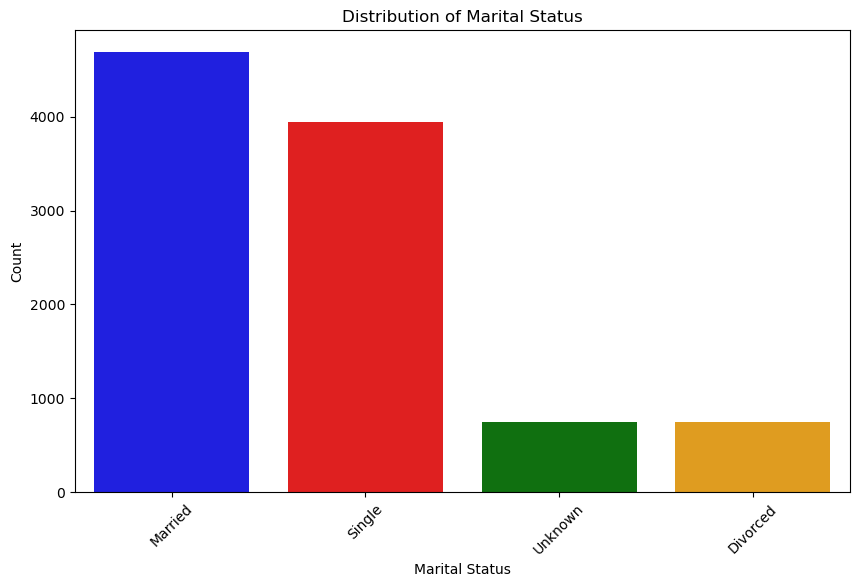

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

custom_colors = ['blue', 'red', 'green', 'orange']

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Marital_Status', hue='Marital_Status', palette=custom_colors, legend=False)

plt.xticks(rotation=45)
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.title("Distribution of Marital Status")
plt.show()


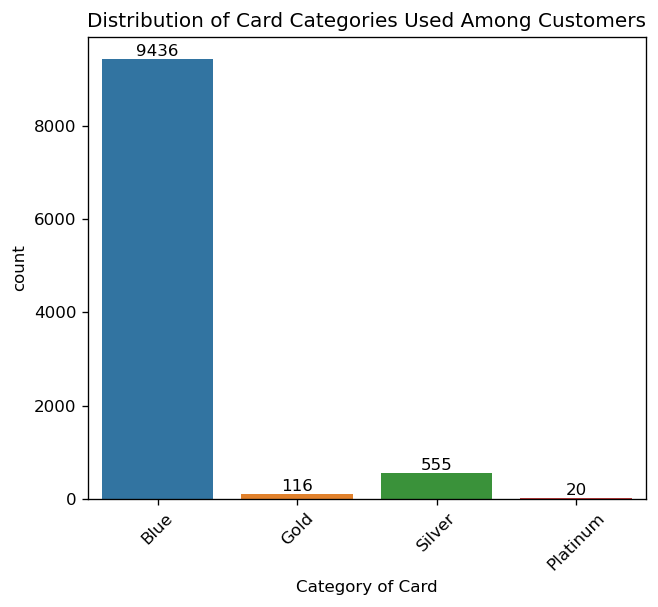

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,5), dpi=120)
plt.title('Distribution of Card Categories Used Among Customers')

a = sns.countplot(data=df, x='Card_Category', hue='Card_Category', palette='tab10', legend=False)

for i in a.containers:
    a.bar_label(i)

plt.xlabel('Category of Card')
plt.xticks(rotation=45) 
plt.show()


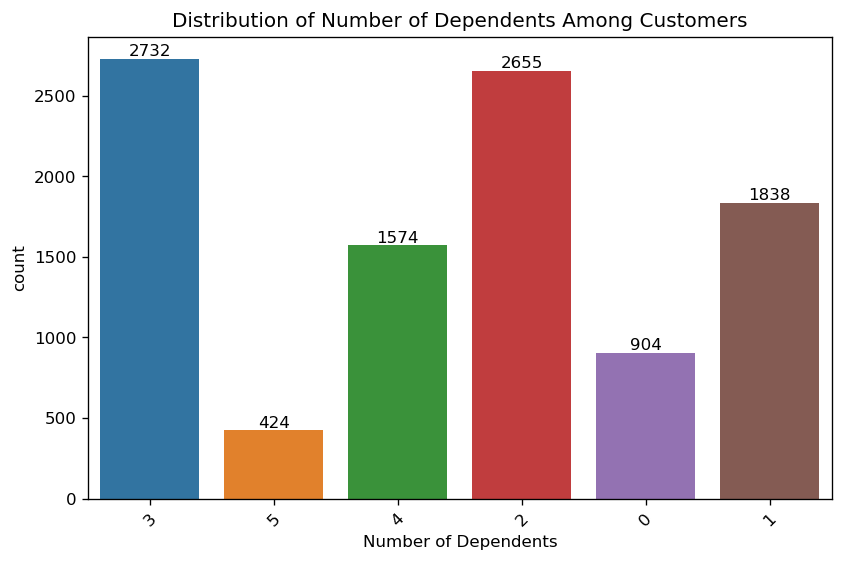

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Dependents'] = df['Dependents'].astype(str)

plt.figure(figsize=(8,5), dpi=120)
plt.title('Distribution of Number of Dependents Among Customers')

a = sns.countplot(data=df, x='Dependents', hue='Dependents', palette='tab10', legend=False)


for i in a.containers:
    a.bar_label(i)

plt.xlabel('Number of Dependents')
plt.xticks(rotation=45)  
plt.show()

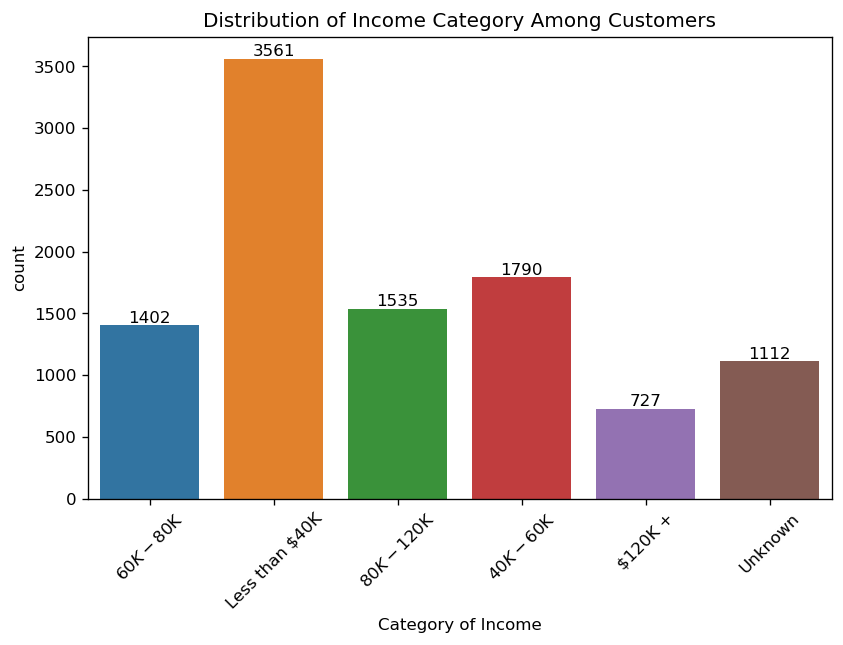

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5), dpi=120)
plt.title('Distribution of Income Category Among Customers')
a = sns.countplot(data=df, x='Income_Category', hue='Income_Category', palette='tab10', legend=False)

for i in a.containers:
    a.bar_label(i)

plt.xlabel('Category of Income')
plt.xticks(rotation=45) 
plt.show()


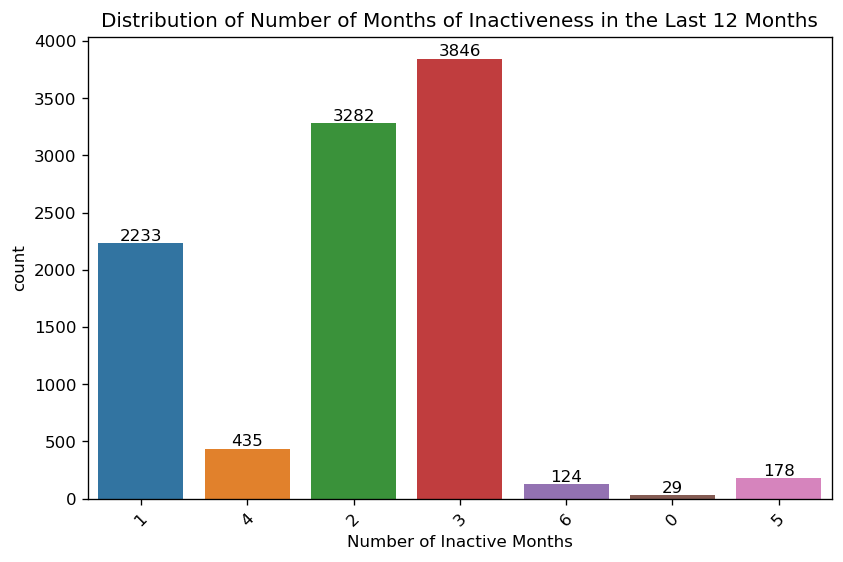

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns


df['Inactive_Months'] = df['Inactive_Months'].astype(str)

plt.figure(figsize=(8,5), dpi=120)
plt.title('Distribution of Number of Months of Inactiveness in the Last 12 Months')

a = sns.countplot(data=df, x='Inactive_Months', hue='Inactive_Months', palette='tab10', legend=False)

for i in a.containers:
    a.bar_label(i)

plt.xlabel('Number of Inactive Months')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


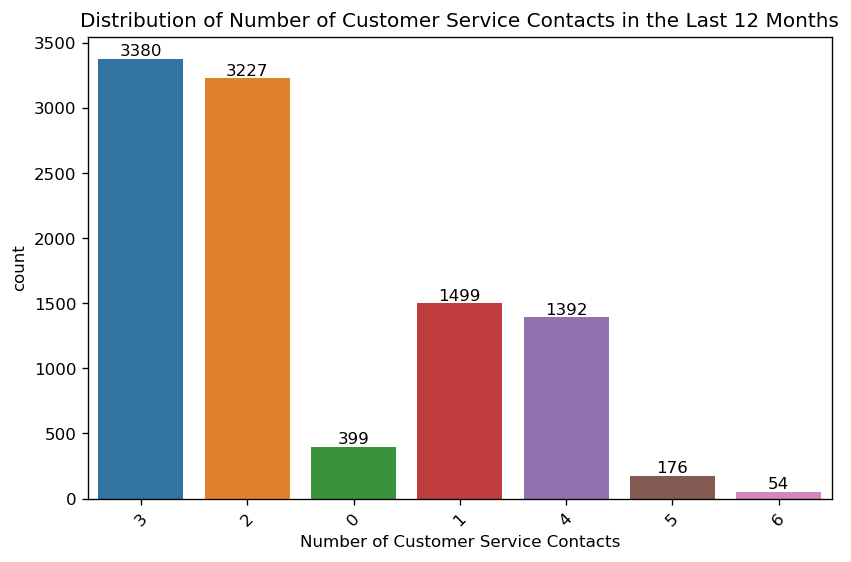

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Customer_Service_Calls'] = df['Customer_Service_Calls'].astype(str)

plt.figure(figsize=(8,5), dpi=120)
plt.title('Distribution of Number of Customer Service Contacts in the Last 12 Months')

a = sns.countplot(data=df, x='Customer_Service_Calls', hue='Customer_Service_Calls', palette='tab10', legend=False)

# Add labels on bars
for i in a.containers:
    a.bar_label(i)

plt.xlabel('Number of Customer Service Contacts')
plt.xticks(rotation=45)
plt.show()


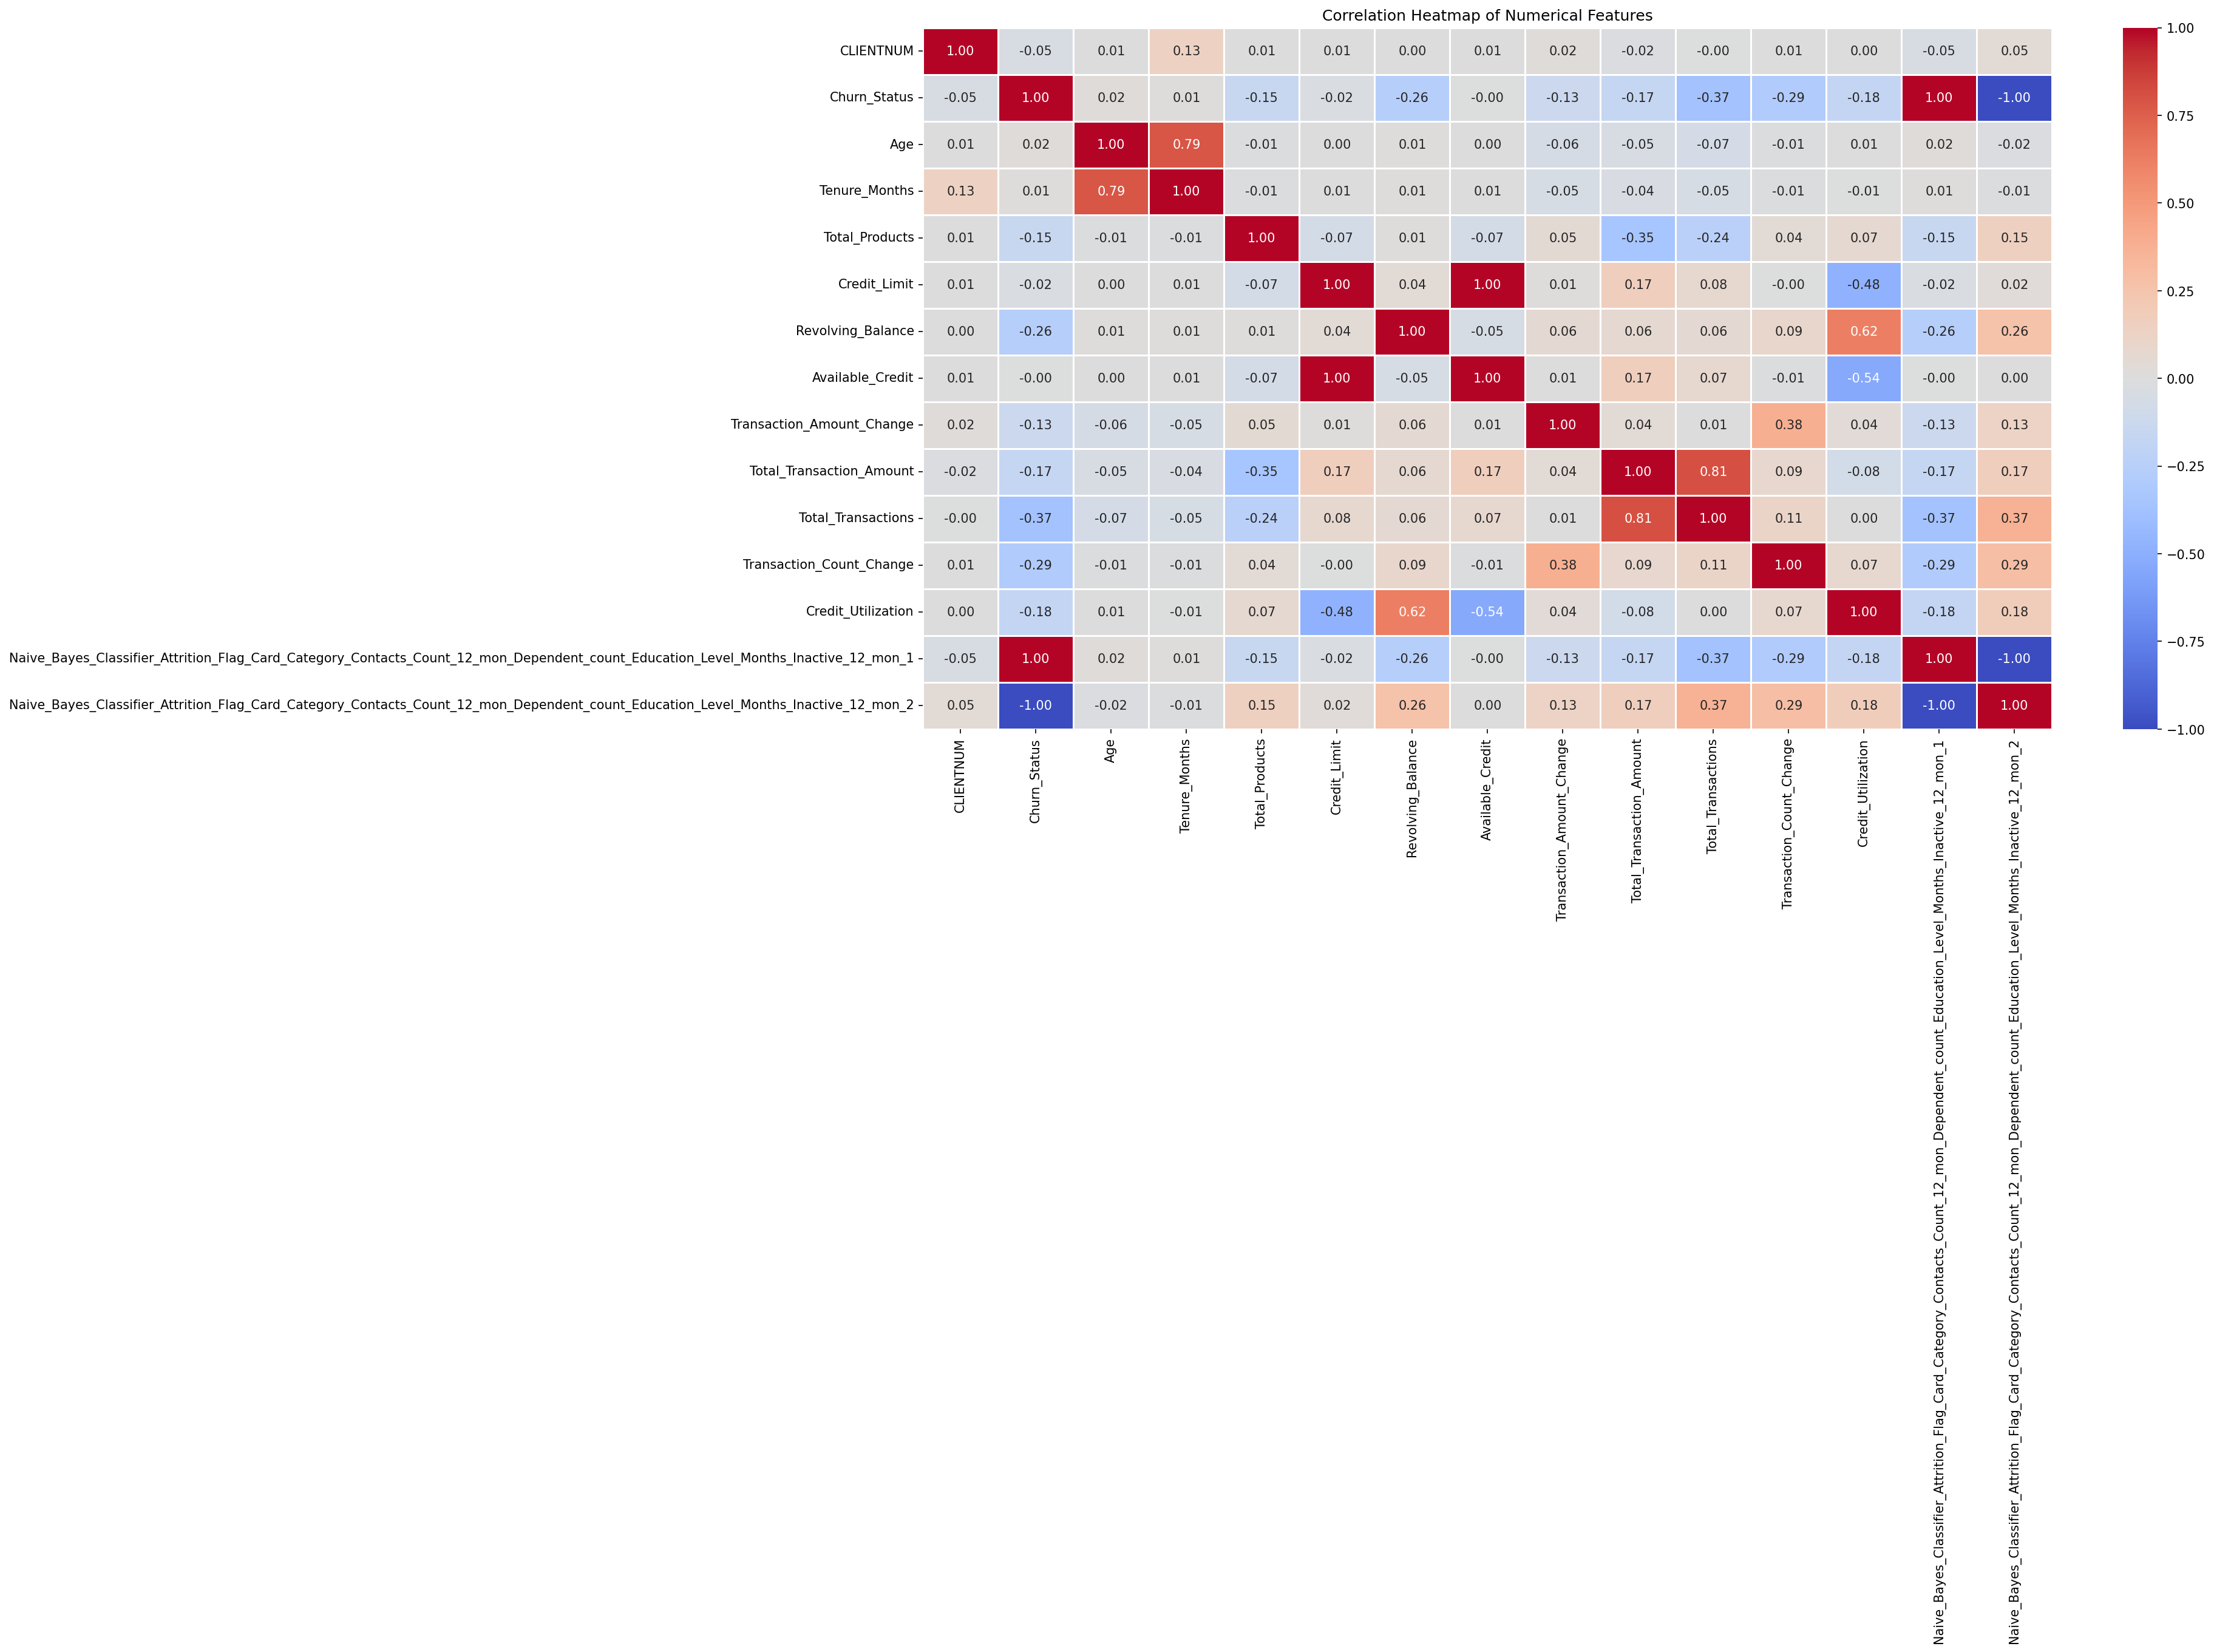

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

df_num = df.select_dtypes(include=['number'])

corr_matrix = df_num.corr()

corr_matrix.fillna(0, inplace=True)

plt.figure(figsize=(20,10), dpi=150)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of Numerical Features")
plt.show()

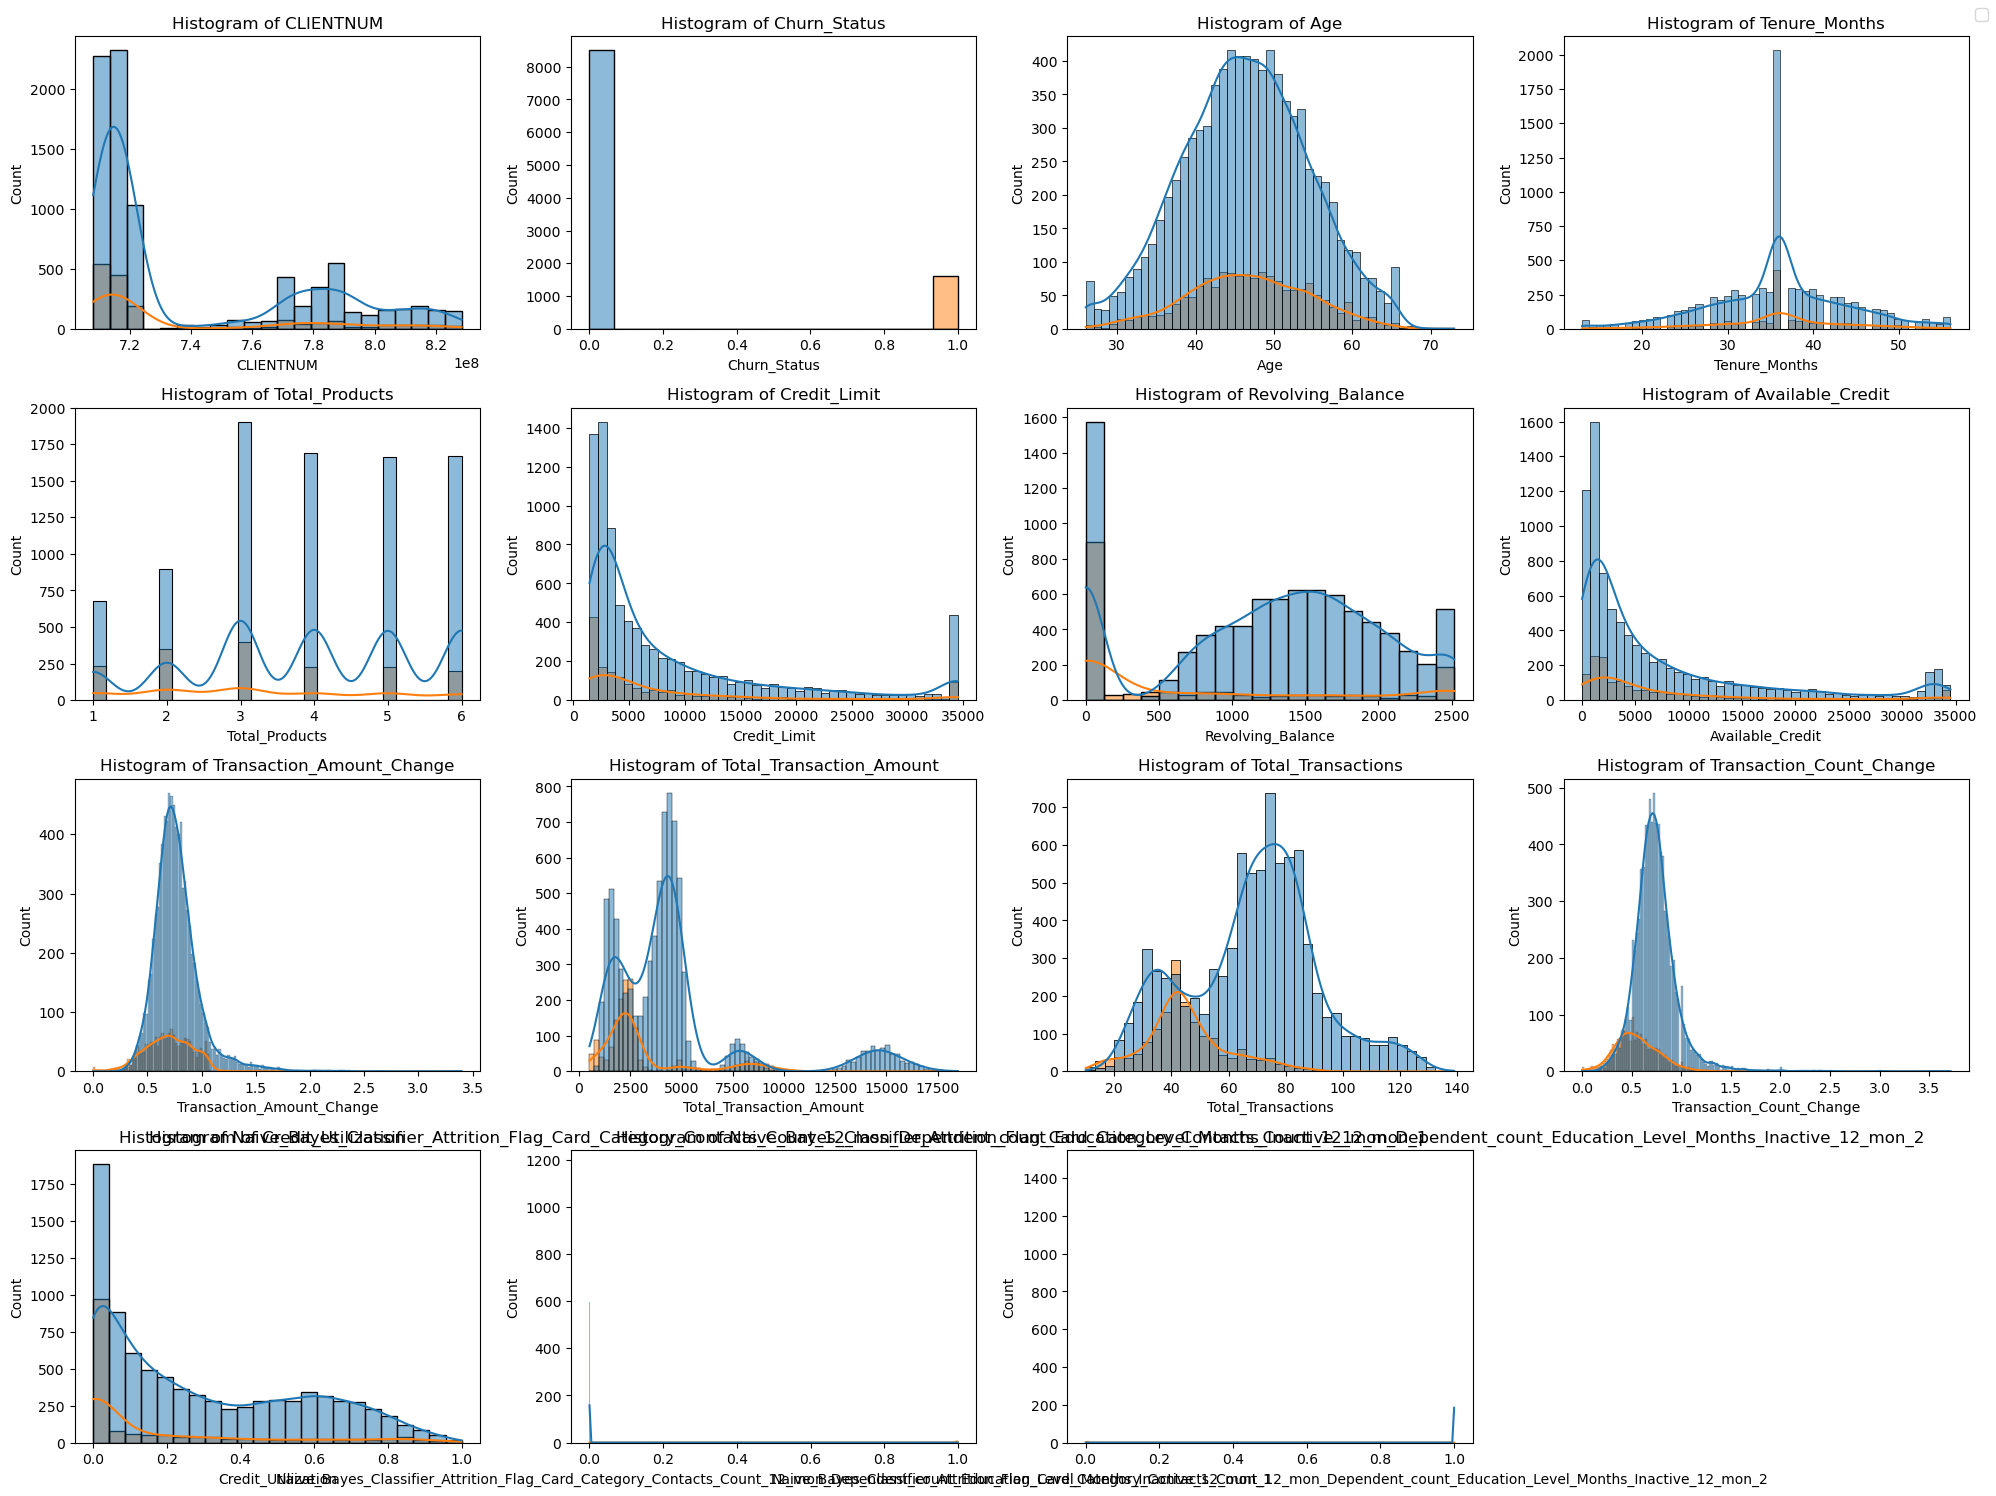

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
df_num = df.select_dtypes(include=['number'])
col = list(df_num.columns)

# Define subplot grid (4x4)
fig, axes = plt.subplots(4, 4, figsize=(20, 15))
k = 0

# Loop through the grid and plot histograms
for i in range(4):
    for j in range(4):
        if k < len(col):
            sns.histplot(data=df, x=col[k], ax=axes[i, j], kde=True, hue='Churn_Status', legend=False)
            axes[i, j].set_title(f'Histogram of {col[k]}')
            k += 1
        else:
            axes[i, j].axis('off')  # Hide empty subplots

# Show legend only once (to avoid repetition)
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize=12, frameon=True)

plt.tight_layout()
plt.show()

In [114]:
df_num.skew()

CLIENTNUM                                                                                                                             0.995601
Churn_Status                                                                                                                          1.848449
Age                                                                                                                                  -0.033605
Tenure_Months                                                                                                                        -0.106565
Total_Products                                                                                                                       -0.162452
Credit_Limit                                                                                                                          1.666726
Revolving_Balance                                                                                                                    -0.148837

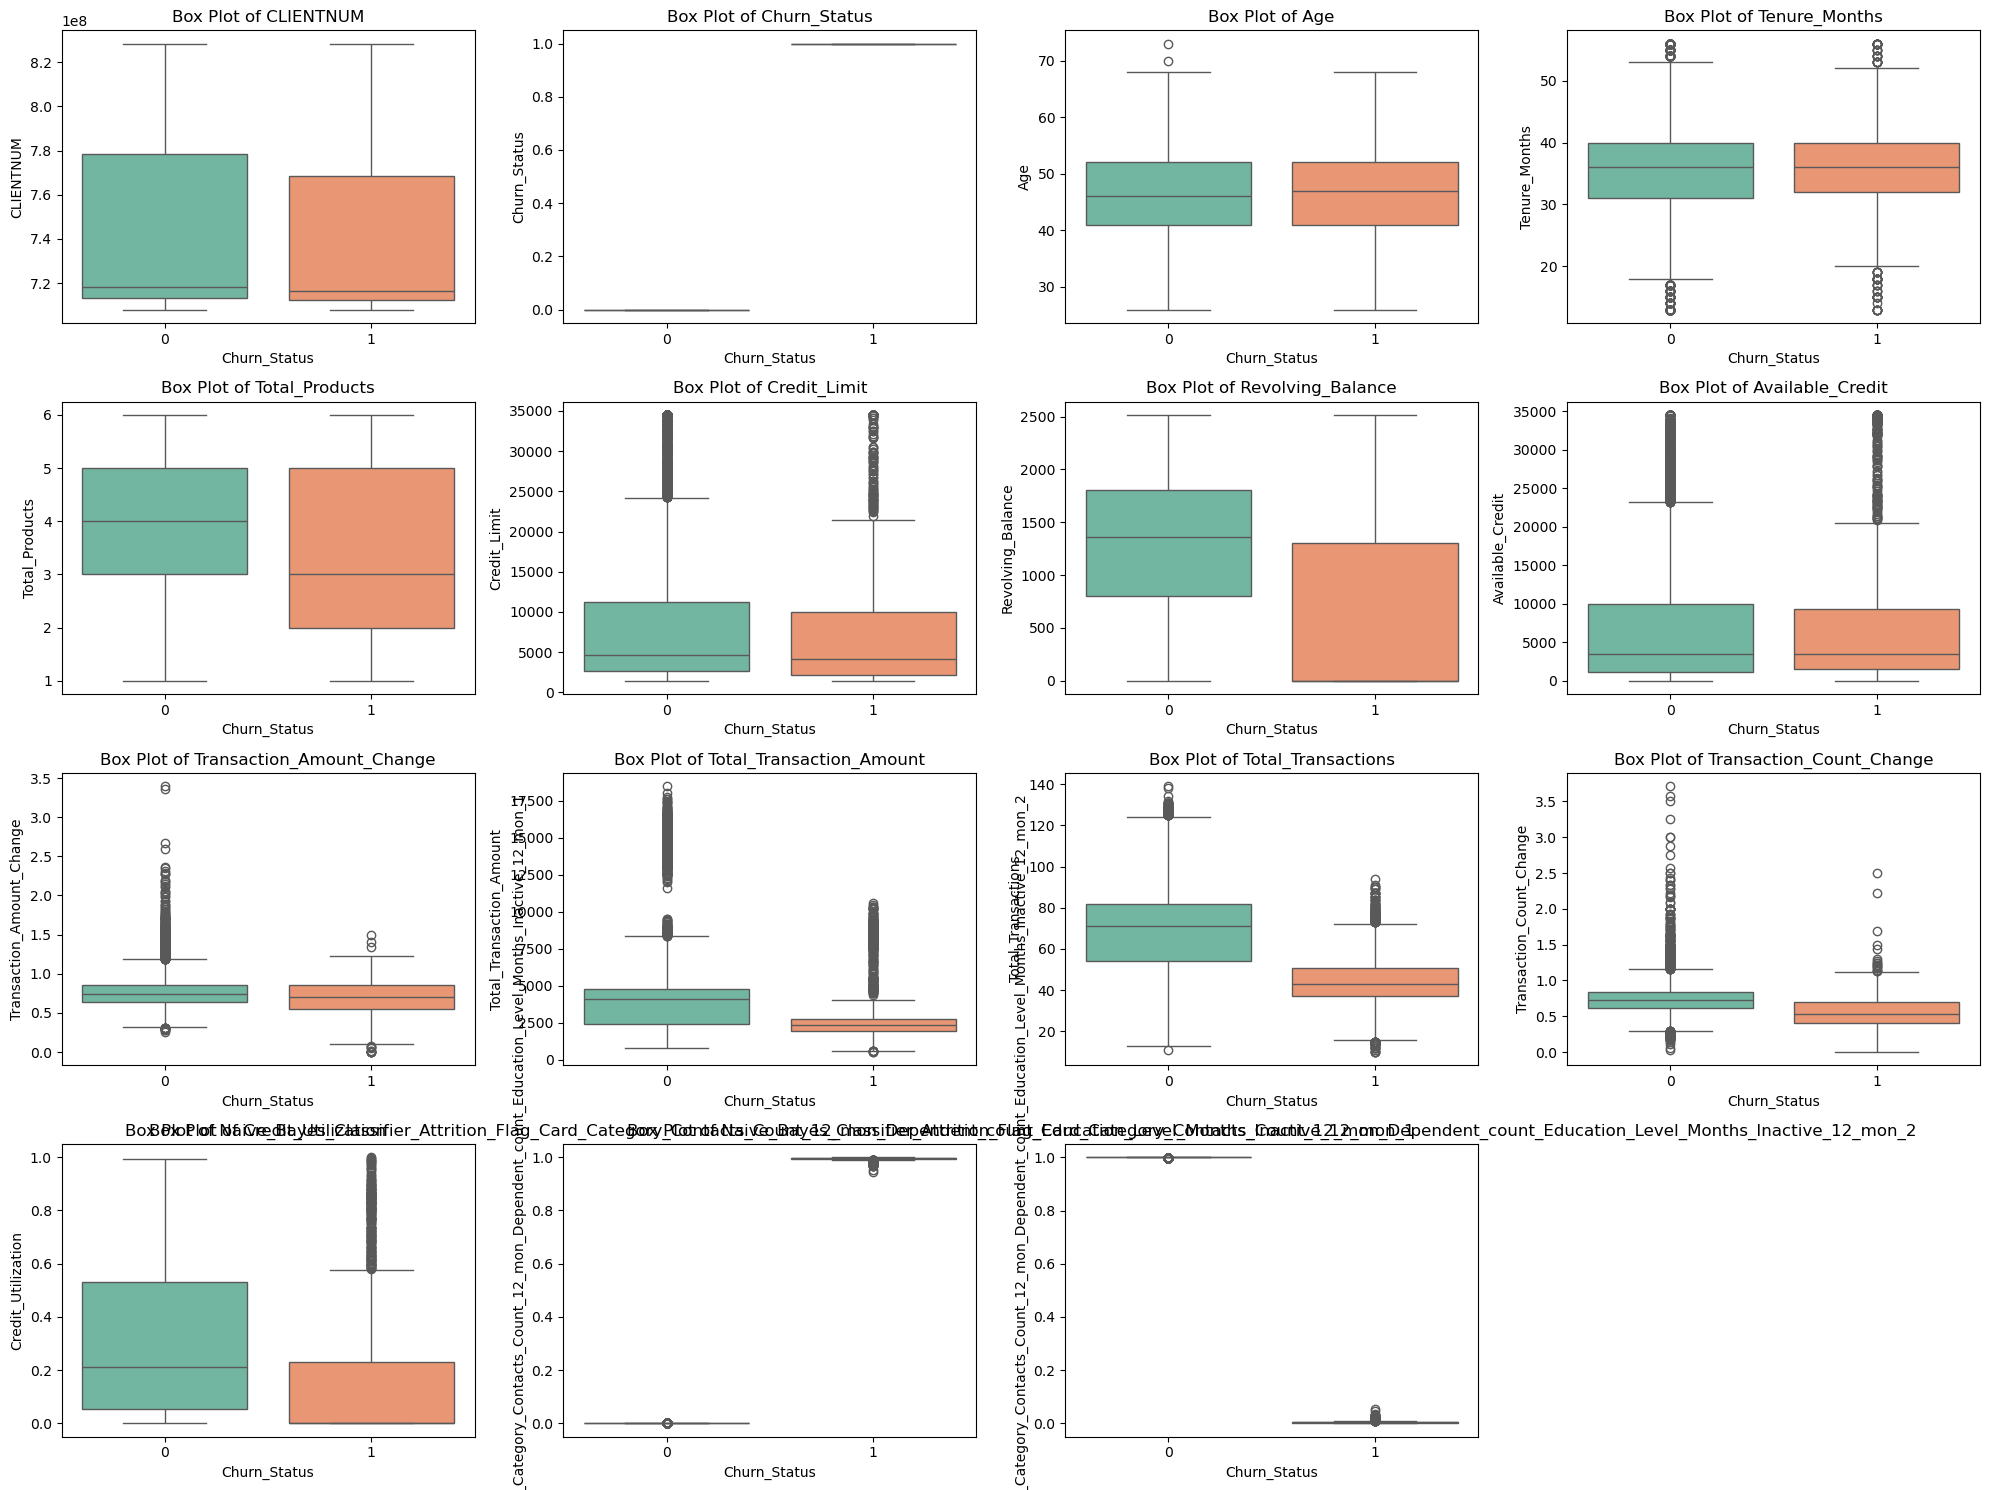

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
df_num = df.select_dtypes(include=['number'])
col = list(df_num.columns)

# Define subplot grid (4x4)
fig, axes = plt.subplots(4, 4, figsize=(20, 15))
k = 0

# Loop through the grid and plot box plots
for i in range(4):
    for j in range(4):
        if k < len(col):
            sns.boxplot(data=df, x='Churn_Status', y=col[k], ax=axes[i, j], palette='Set2', hue='Churn_Status', legend=False)
            axes[i, j].set_title(f'Box Plot of {col[k]}')
            k += 1
        else:
            axes[i, j].axis('off')  # Hide empty subplots

plt.tight_layout()
plt.show()

In [123]:
def outlier(a):
    """ 
    Function to calculate the lower and upper bounds for detecting outliers using the IQR method.

    Parameters:
    a (pd.Series): A numerical pandas series.

    Returns:
    tuple: (Lower bound, Upper bound) for outliers.
    """
    if a.dtype not in ['int64', 'float64']:  # Ensure the column is numeric
        raise ValueError("Input must be a numerical column.")
    
    Q1 = a.quantile(0.25)
    Q3 = a.quantile(0.75)
    IQR = Q3 - Q1
    L = Q1 - 1.5 * IQR
    U = Q3 + 1.5 * IQR

    return L, U


In [133]:

df.columns = df.columns.str.strip()


outlier_columns = [
    'Credit_Limit', 'Tenure_Months', 'Available_Credit',
    'Transaction_Amount_Change', 'Transaction_Count_Change', 'Total_Transaction_Amount'
]

for col in outlier_columns:
    if col in df.columns:  # Ensure column exists before processing
        lower, upper = outlier(df[col])  # Get outlier boundaries
        df = df[(df[col] >= lower) & (df[col] <= upper)]  # Filter valid values
    else:
        print(f"⚠️ Warning: Column '{col}' not found in dataset!")

print(f"✅ Data after removing outliers: {df.shape[0]} rows remaining.")



✅ Data after removing outliers: 6446 rows remaining.


In [135]:
df.shape

(6446, 23)

In [137]:
from sklearn.preprocessing import LabelEncoder

# Select categorical columns
cat_columns = df.select_dtypes(include=['object']).columns

# Initialize Label Encoder
LE = LabelEncoder()

# Encode categorical columns safely
for col in cat_columns:
    df.loc[:, col] = LE.fit_transform(df[col])

print("✅ Categorical features successfully label-encoded!")


✅ Categorical features successfully label-encoded!


In [139]:
from sklearn.preprocessing import StandardScaler

In [141]:
scaler = StandardScaler()

In [143]:
scaled_df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [145]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(scaled_df)
PCA_ds = pd.DataFrame(pca.transform(scaled_df), columns=(["col1","col2", "col3"]))

In [147]:
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%  \
col1  6446.0 -1.763680e-17  2.015013 -6.428794 -0.334961  0.681929  1.338398   
col2  6446.0  0.000000e+00  1.597945 -3.619724 -1.277440 -0.362448  1.000792   
col3  6446.0  0.000000e+00  1.382674 -5.310131 -0.837458  0.075523  0.930787   

           max  
col1  2.858606  
col2  5.309582  
col3  4.442822

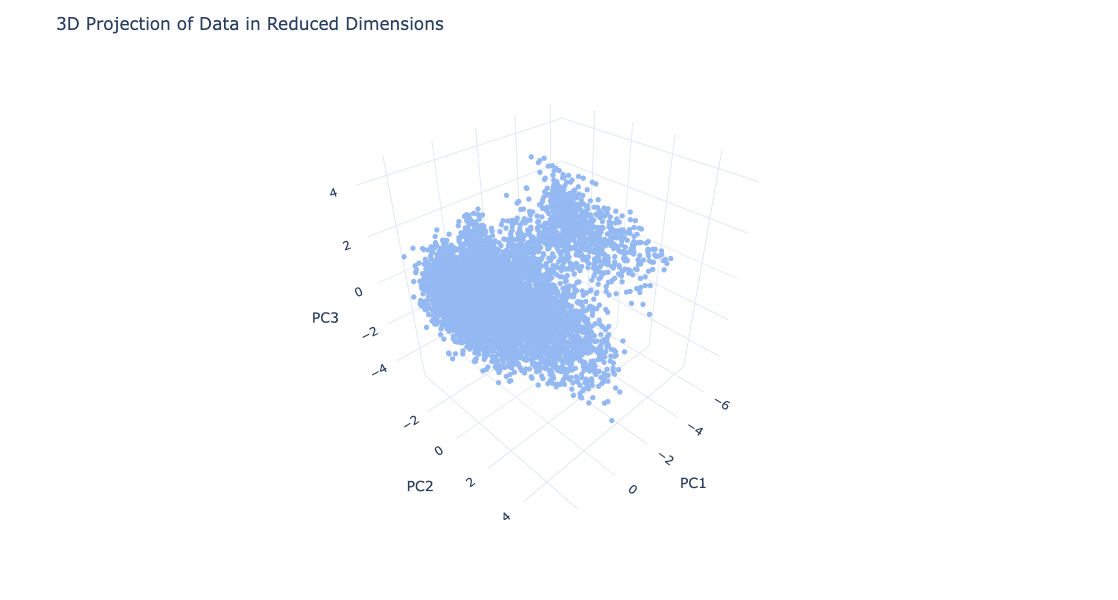

In [153]:
import plotly.express as px

PCA_ds.columns = ['PC1', 'PC2', 'PC3']


px.defaults.template = "plotly_white"
fig = px.scatter_3d(PCA_ds, 
                     x='PC1', y='PC2', z='PC3', 
                     color=None,  
                     color_discrete_sequence=['#94b8f2'])

fig.update_traces(marker=dict(size=3))

fig.update_layout(title="3D Projection of Data in Reduced Dimensions", 
                  height=600, width=800)
fig.show()



In [155]:
data = PCA_ds

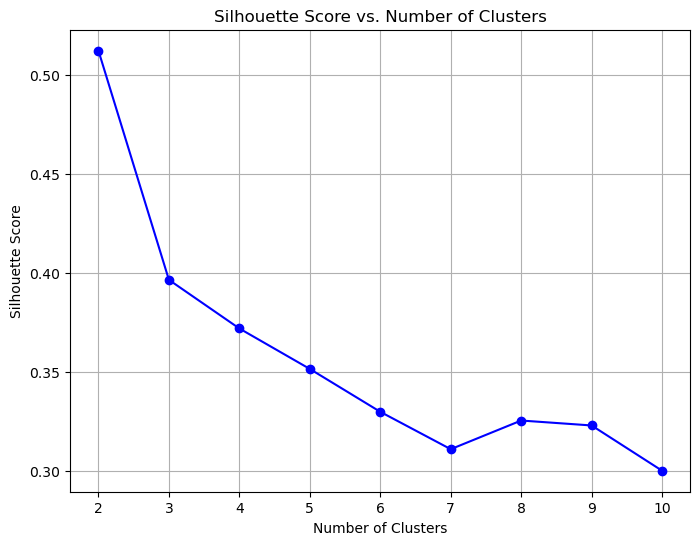

✅ Optimal number of clusters (k) = 2 with silhouette score = 0.5124


In [160]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

numeric_data = data.select_dtypes(include=['number'])

range_n_clusters = list(range(2, 11))

silhouette_scores = []

for n_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(numeric_data)
    
    silhouette_avg = silhouette_score(numeric_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

best_k = range_n_clusters[np.argmax(silhouette_scores)]
print(f"✅ Optimal number of clusters (k) = {best_k} with silhouette score = {np.max(silhouette_scores):.4f}")


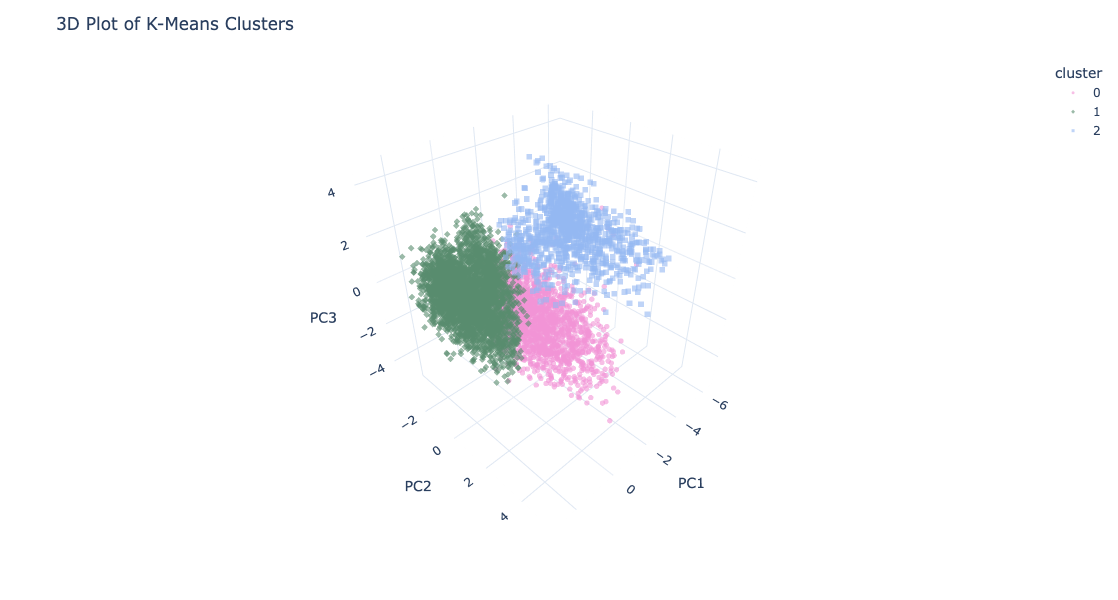

In [162]:
import plotly.express as px
from sklearn.cluster import KMeans

PCA_ds.columns = ['PC1', 'PC2', 'PC3']

model = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = model.fit_predict(PCA_ds)

df['cluster'] = cluster_labels
PCA_ds['cluster'] = cluster_labels.astype(str)  

cluster_colors = {'0': "#f294d6", '1': "#588c6e", '2': "#94b8f2"}

fig = px.scatter_3d(PCA_ds.sort_values(by='cluster'), 
                     x='PC1', y='PC2', z='PC3',
                     color='cluster', 
                     color_discrete_map=cluster_colors,  # Use color_discrete_map instead of sequence
                     opacity=0.6, 
                     symbol='cluster')

fig.update_traces(marker=dict(size=3))

fig.update_layout(title="3D Plot of K-Means Clusters", height=600, width=800)

fig.show()


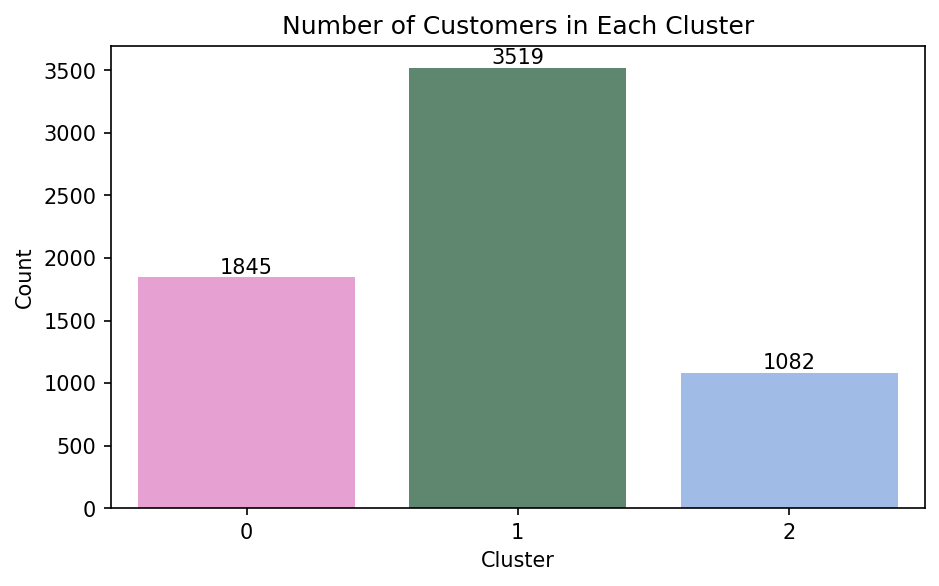

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns


df['cluster'] = df['cluster'].astype(str)

cluster_colors = {'0': "#f294d6", '1': "#588c6e", '2': "#94b8f2"}

palette = [cluster_colors[str(cluster)] for cluster in sorted(df['cluster'].unique())]

plt.figure(figsize=(7,4), dpi=150)
a = sns.countplot(data=df, x='cluster', hue='cluster', palette=palette, legend=False) 


for i in a.containers:
    a.bar_label(i)

plt.title('Number of Customers in Each Cluster')
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()



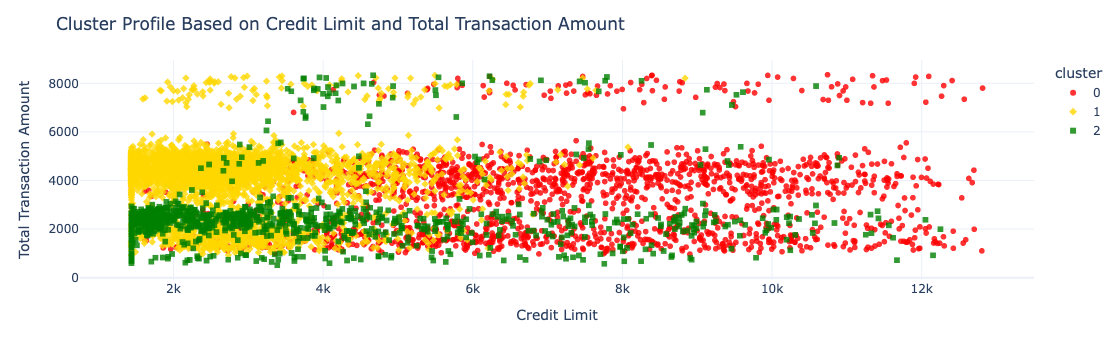

In [174]:
import plotly.express as px
df["cluster"] = df["cluster"].astype(str)
cluster_colors = {'0': "#FF0000",  # Red
                  '1': "#FFD700",  # Yellow (Gold)
                  '2': "#008000"}  # Green
fig = px.scatter(df.sort_values(by='cluster'), 
                 x="Credit_Limit", 
                 y="Total_Transaction_Amount",
                 color='cluster', 
                 color_discrete_map=cluster_colors, 
                 opacity=0.8, 
                 symbol='cluster')
fig.update_yaxes(title_text="Total Transaction Amount")
fig.update_xaxes(title_text="Credit Limit")
fig.update_traces(showlegend=True)
fig.update_layout(title="Cluster Profile Based on Credit Limit and Total Transaction Amount")
fig.show()

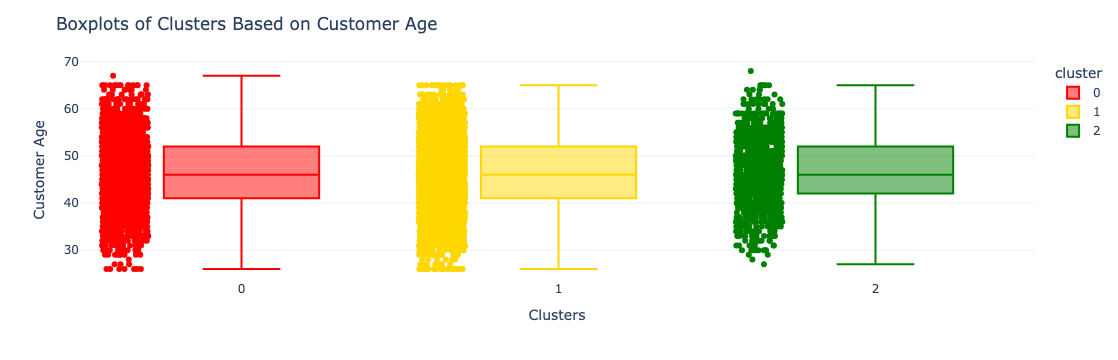

In [176]:
import plotly.express as px
df["cluster"] = df["cluster"].astype(str)
cluster_colors = {'0': "#FF0000",  # Red
                  '1': "#FFD700",  # Yellow (Gold)
                  '2': "#008000"}  # Green
fig = px.box(df.sort_values(by='cluster'), 
             x="cluster", 
             y="Age",  
             color='cluster', 
             color_discrete_map=cluster_colors,  
             points='all')
fig.update_yaxes(title_text="Customer Age")
fig.update_xaxes(title_text="Clusters")
fig.update_layout(title="Boxplots of Clusters Based on Customer Age")
fig.show()

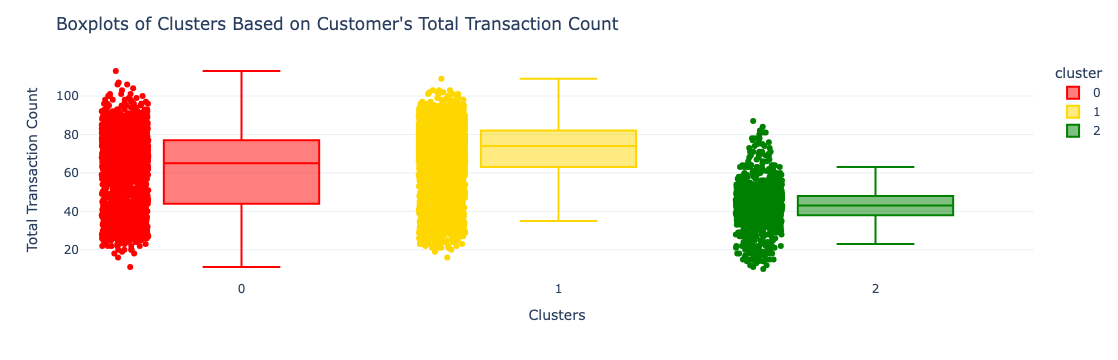

In [178]:
import plotly.express as px

df["cluster"] = df["cluster"].astype(str)
cluster_colors = {'0': "#FF0000",  # Red
                  '1': "#FFD700",  # Yellow (Gold)
                  '2': "#008000"}  # Green
fig = px.box(df.sort_values(by='cluster'), 
             x="cluster", 
             y="Total_Transactions", 
             color='cluster', 
             color_discrete_map=cluster_colors,
             points='all')

fig.update_yaxes(title_text="Total Transaction Count")
fig.update_xaxes(title_text="Clusters")
fig.update_layout(title="Boxplots of Clusters Based on Customer's Total Transaction Count")
fig.show()

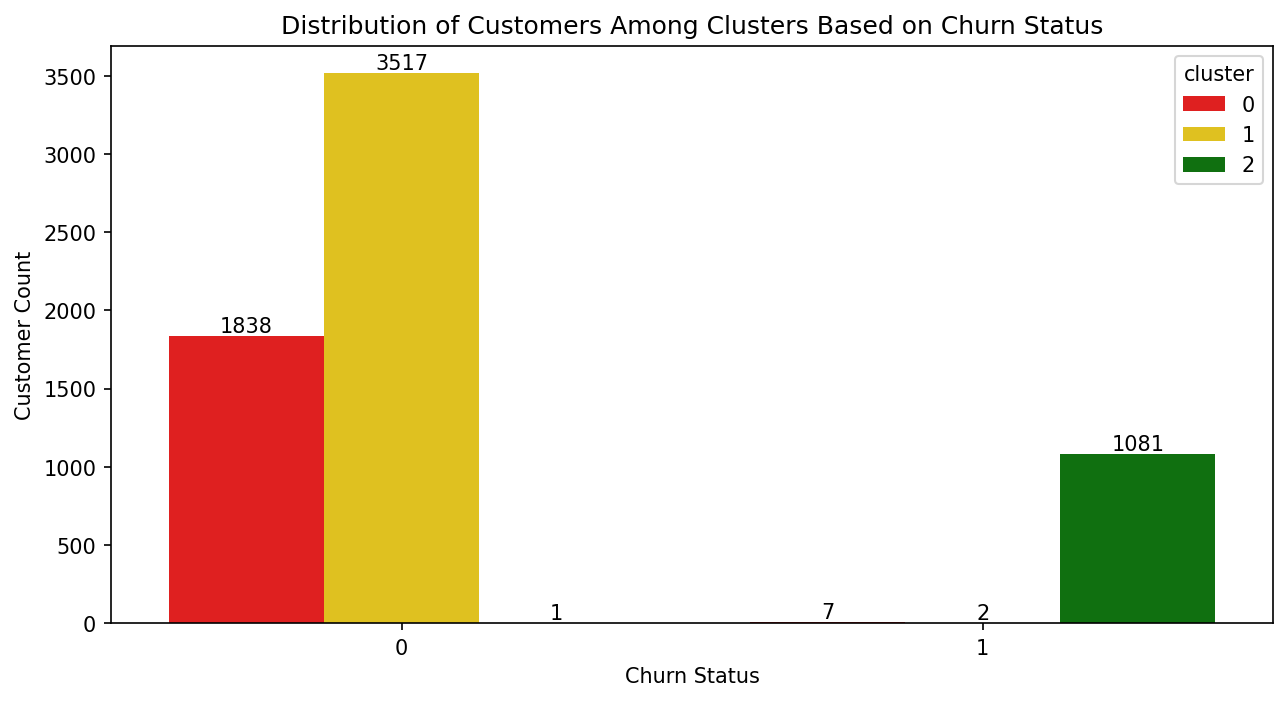

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns
df['cluster'] = df['cluster'].astype(str)
cluster_colors = {'0': "#FF0000",
                  '1': "#FFD700",
                  '2': "#008000"}
palette = [cluster_colors[str(cluster)] for cluster in sorted(df['cluster'].unique())]
plt.figure(figsize=(10,5), dpi=150)
a = sns.countplot(data=df.sort_values(by='cluster'), 
                  x='Churn_Status',
                  hue='cluster', 
                  palette=palette)
for i in a.containers:
    a.bar_label(i)
plt.title("Distribution of Customers Among Clusters Based on Churn Status")
plt.xlabel("Churn Status")
plt.ylabel("Customer Count")
plt.show()

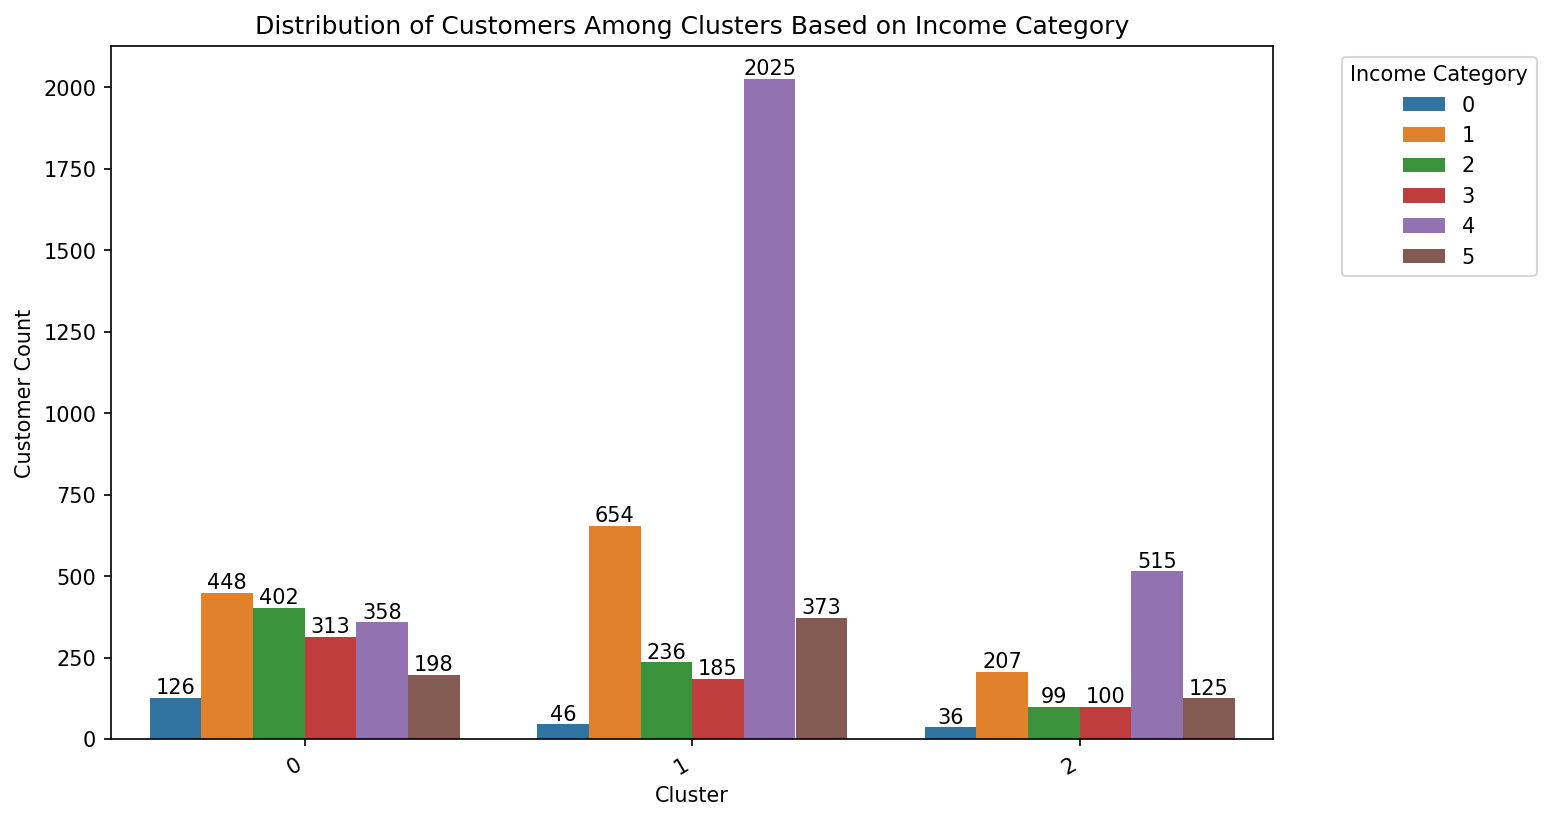

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns
df['cluster'] = df['cluster'].astype(str)
plt.figure(figsize=(10,6), dpi=150)
a = sns.countplot(data=df.sort_values(by='cluster'), 
                  x='cluster', 
                  hue='Income_Category', 
                  palette='tab10') 
for i in a.containers:
    a.bar_label(i)
plt.xticks(rotation=30, ha="right") 
plt.title("Distribution of Customers Among Clusters Based on Income Category")
plt.xlabel("Cluster")
plt.ylabel("Customer Count")
plt.legend(title="Income Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()